In [171]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

In [172]:
import os
import shutil
import itertools
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [66]:
metadata = pd.read_csv("data\DL_info.csv")
metadata.describe()

,Patient_index,Study_index,Series_ID,Key_slice_index,Coarse_lesion_type,Possibly_noisy,Patient_age,Train_Val_Test
count,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32734.000000,32735.000000
mean,1882.226516,3.058592,1.300168,132.518803,0.564381,0.001069,52.964991,1.450374
std,1267.939787,2.750793,0.544712,125.103756,2.613362,0.032682,16.385262,0.740660
min,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,727.000000,1.000000,1.000000,51.000000,-1.000000,0.000000,43.000000,1.000000
50%,1736.000000,2.000000,1.000000,85.000000,-1.000000,0.000000,56.000000,1.000000
75%,2965.000000,4.000000,2.000000,176.000000,2.000000,0.000000,65.000000,2.000000
max,4459.000000,26.000000,5.000000,1141.000000,8.000000,1.000000,157.000000,3.000000


In [75]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   File_name                   32735 non-null  object 
 1   Patient_index               32735 non-null  int64  
 2   Study_index                 32735 non-null  int64  
 3   Series_ID                   32735 non-null  int64  
 4   Key_slice_index             32735 non-null  int64  
 5   Measurement_coordinates     32735 non-null  object 
 6   Bounding_boxes              32735 non-null  object 
 7   Lesion_diameters_Pixel_     32735 non-null  object 
 8   Normalized_lesion_location  32735 non-null  object 
 9   Coarse_lesion_type          32735 non-null  int64  
 10  Possibly_noisy              32735 non-null  int64  
 11  Slice_range                 32735 non-null  object 
 12  Spacing_mm_px_              32735 non-null  object 
 13  Image_size                  327

In [67]:
metadata.head(10)

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3
5,000002_01_01_162.png,2,1,1,162,"238.314, 261.228, 235.858, 268.594, 240.36, 26...","229.222, 256.228, 245.36, 273.594","7.76388, 6.77335","0.437715, 0.573812, 0.609054",2,0,"156, 168","0.859375, 0.859375, 5","512, 512","-175, 275",F,51.0,2
6,000002_01_01_176.png,2,1,1,176,"275.758, 191.194, 261.137, 190.799, 269.83, 18...","256.137, 180.662, 280.758, 200.541","14.6261, 9.87891","0.508777, 0.438113, 0.66217",2,0,"170, 182","0.859375, 0.859375, 5","512, 512","-175, 275",F,51.0,2
7,000002_02_01_077.png,2,2,1,77,"240.988, 215.969, 228.479, 219.186, 235.984, 2...","223.479, 207.395, 245.988, 228.475","12.9166, 11.6422","0.43167, 0.47806, 0.702035",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2
8,000002_02_01_050.png,2,2,1,50,"313.615, 261.093, 293.88, 259.183, 302.156, 25...","288.88, 248.135, 318.615, 274.051","19.8278, 15.9952","0.596974, 0.57036, 0.60468",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2
9,000002_02_01_065.png,2,2,1,65,"289.383, 205.23, 277.907, 202.448, 285.21, 198...","272.907, 193.623, 294.383, 214.055","11.8077, 10.5244","0.536447, 0.458577, 0.661835",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2


array([[<AxesSubplot:title={'center':'Coarse_lesion_type'}>,
        <AxesSubplot:title={'center':'Train_Val_Test'}>]], dtype=object)

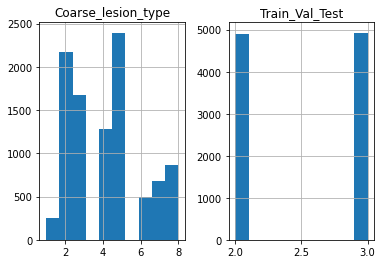

In [68]:
metadata[metadata['Train_Val_Test'].isin([2,3])][['Coarse_lesion_type', 'Train_Val_Test']].hist()

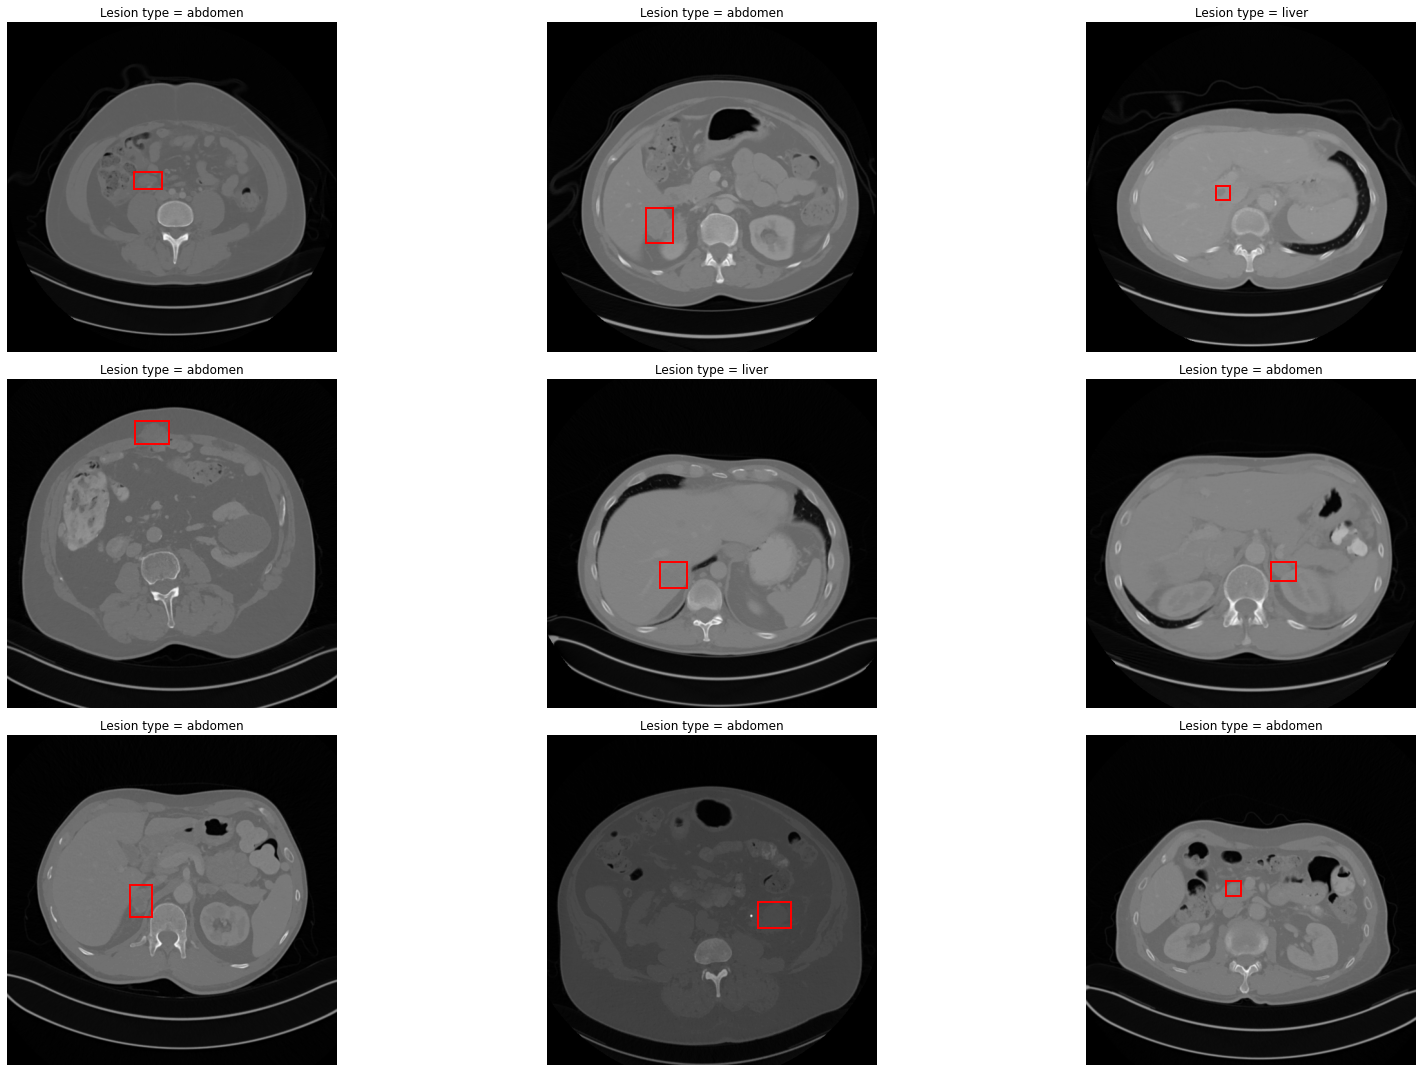

In [114]:
random_state = 42
fig_shape = (3, 3)
fig_size = (25, 15)
lesion_filter = (2, 4)
lesion_types = {1:"bone", 2:"abdomen", 3:"mediastinum", 4:"liver", 5:"lung", 6:"kidney", 7:"soft tissue",  8:"pelvis"}
data_sample = metadata[(metadata['Train_Val_Test'].isin([2,3])) & (metadata['Coarse_lesion_type'].isin(lesion_filter))].sample(n=fig_shape[0]*fig_shape[1], random_state=random_state)
fig, axes = plt.subplots(*fig_shape, figsize=fig_size)
for ax, row in zip(axes.flat, data_sample.itertuples()):
    im = cv2.imread(os.path.join("images", row.File_name), cv2.IMREAD_UNCHANGED)
    ax.imshow(im, cmap="gray")
    ax.axis('off')
    ax.set_title(f"Lesion type = {lesion_types[row.Coarse_lesion_type]}")
    bbox = [float(x) for x in row.Bounding_boxes.split(", ")]
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=2, edgecolor="red", facecolor='none')
    ax.add_patch(rect)
fig.tight_layout()

# Check slice distribution between lesion types

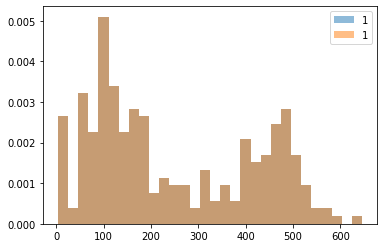

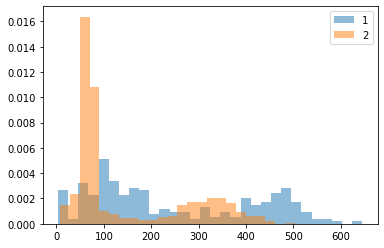

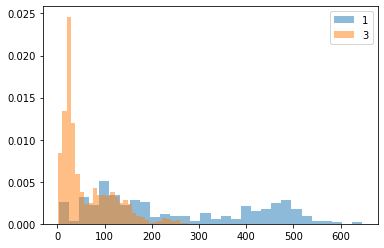

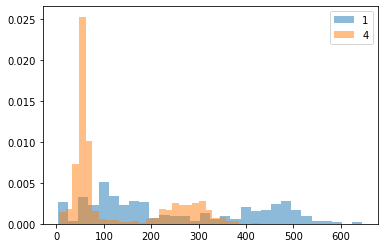

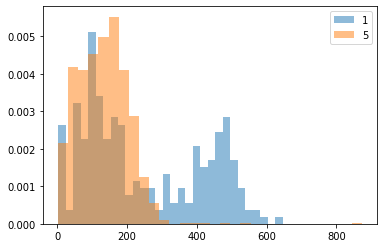

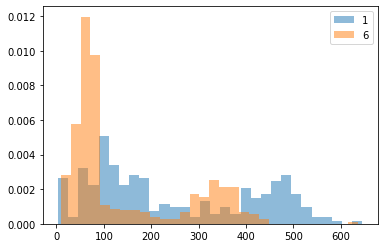

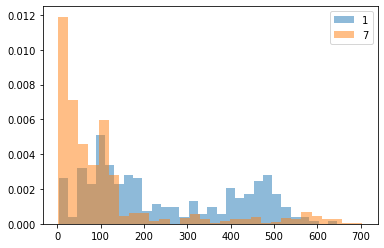

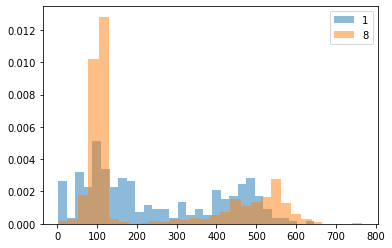

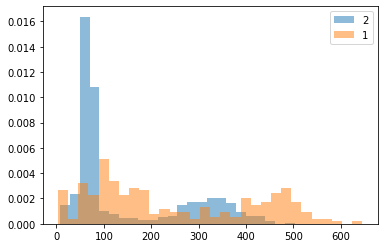

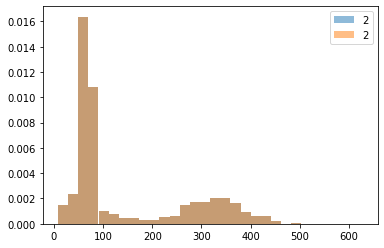

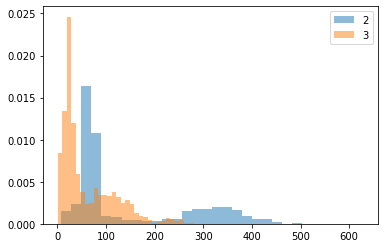

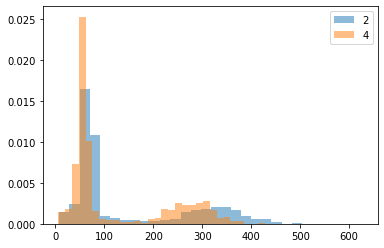

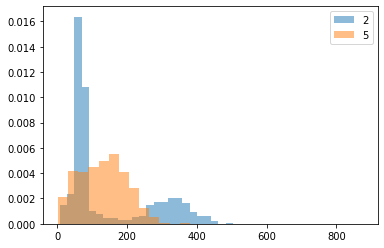

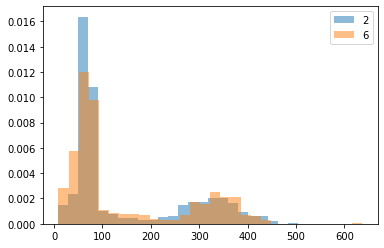

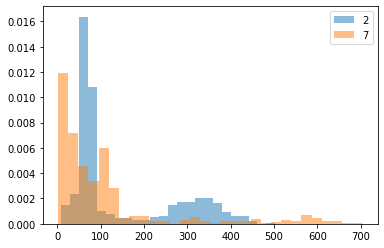

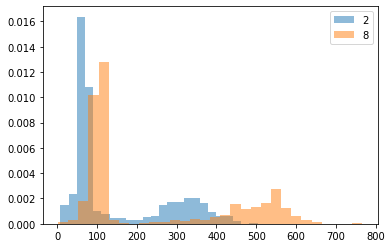

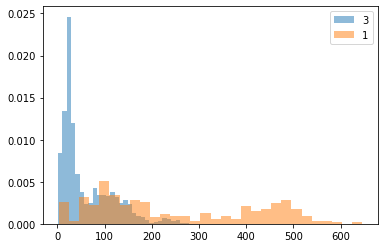

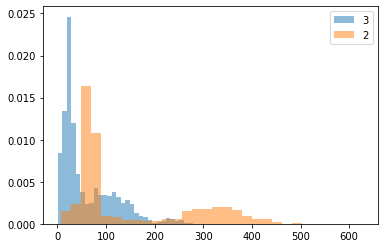

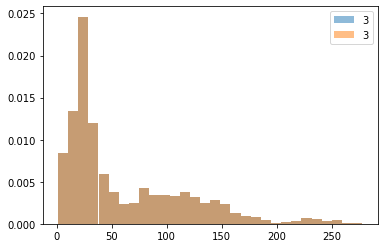

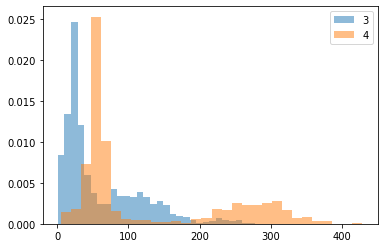

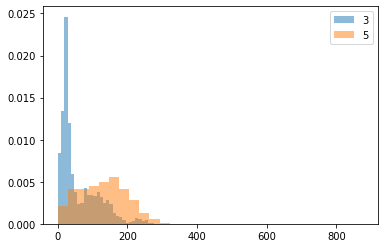

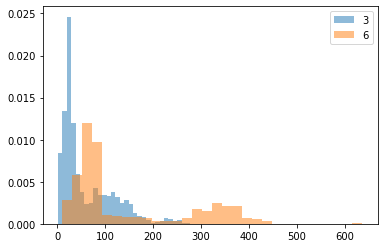

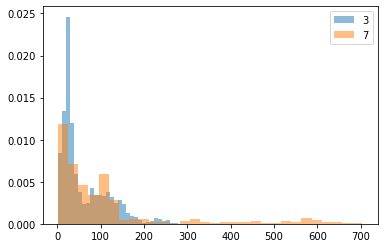

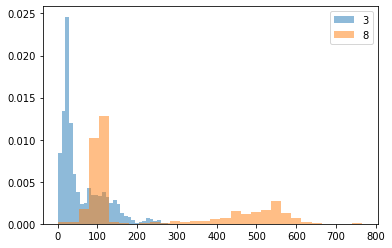

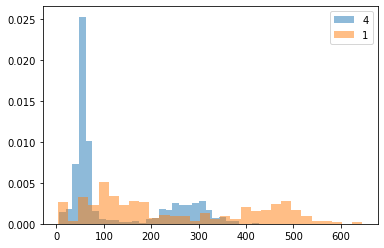

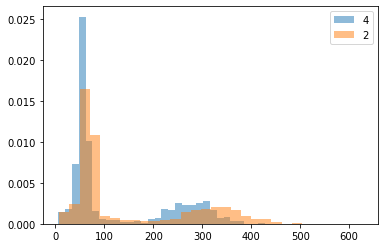

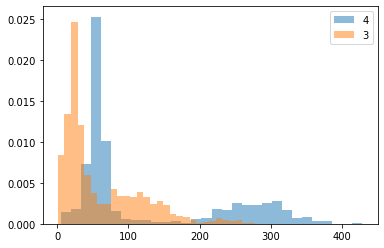

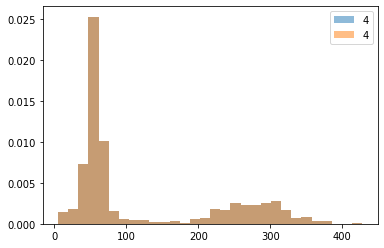

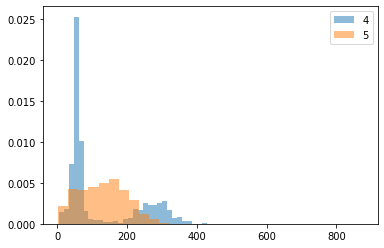

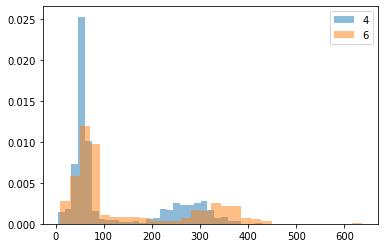

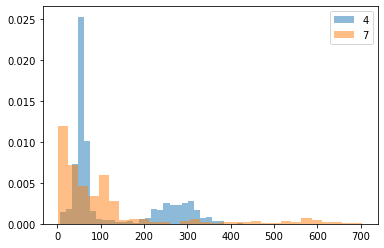

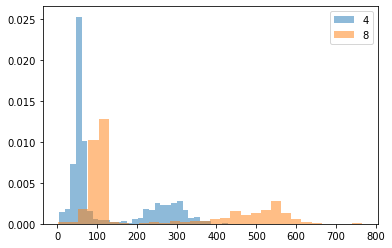

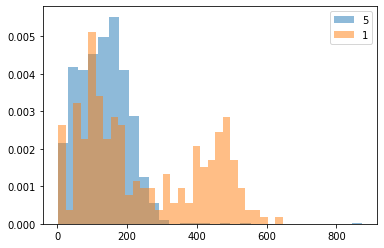

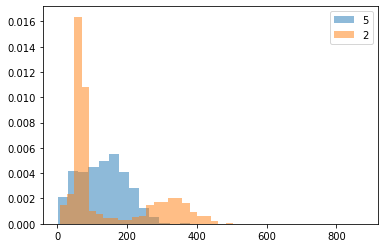

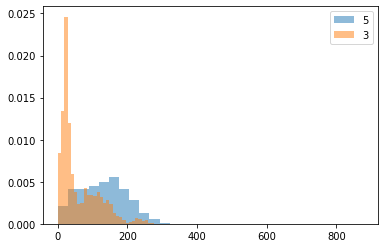

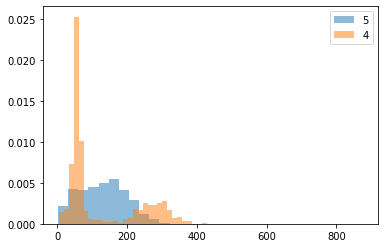

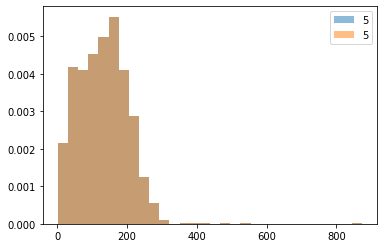

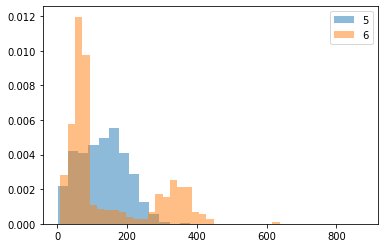

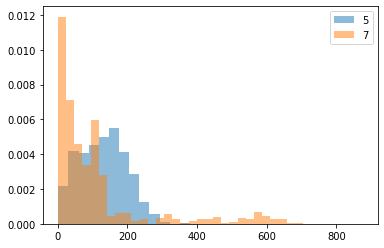

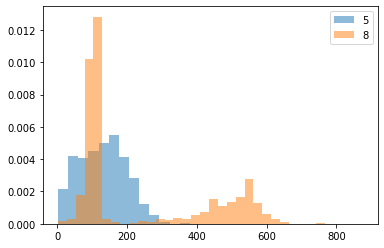

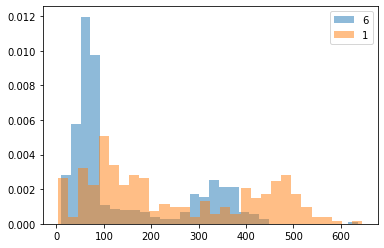

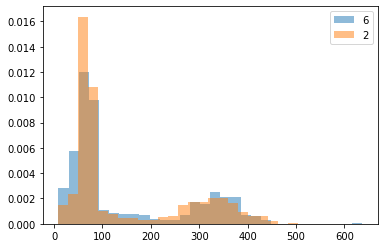

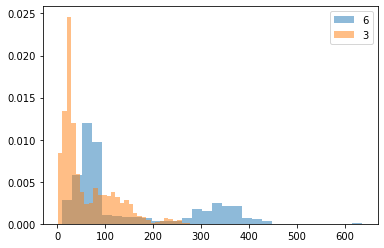

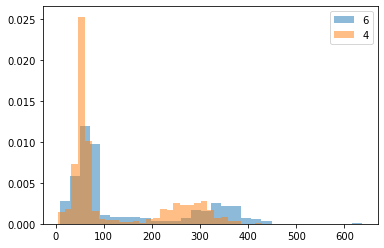

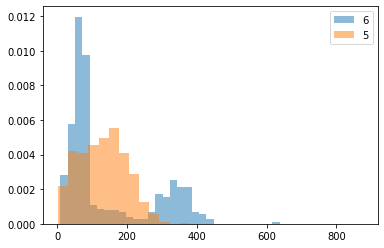

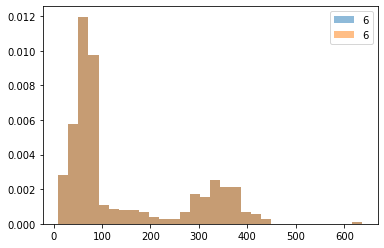

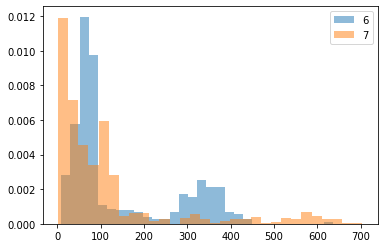

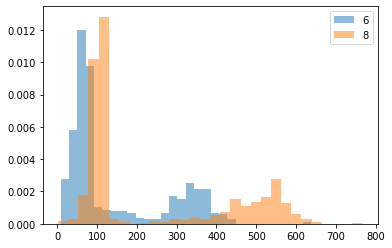

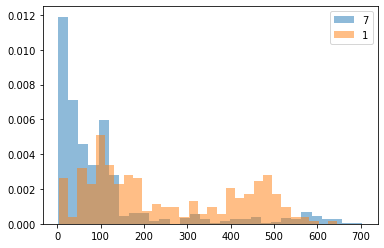

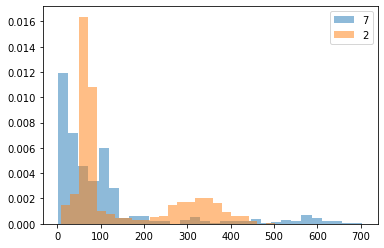

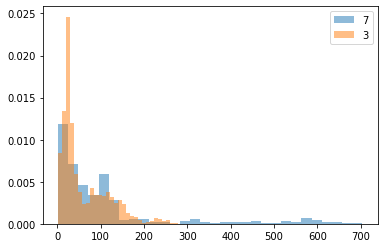

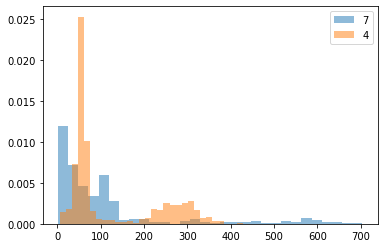

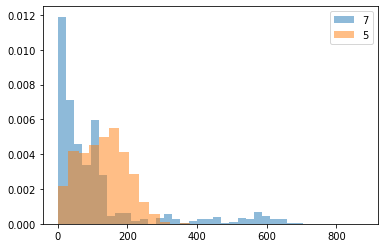

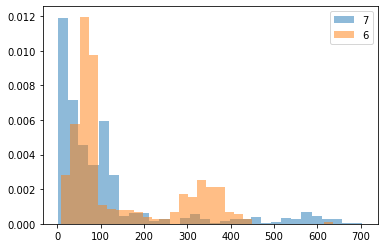

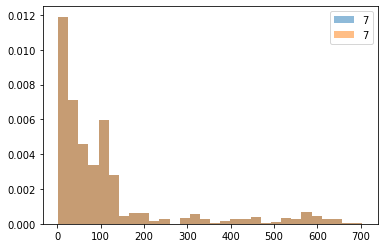

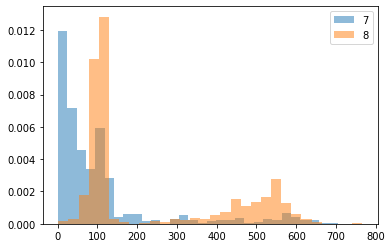

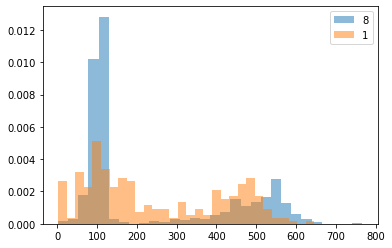

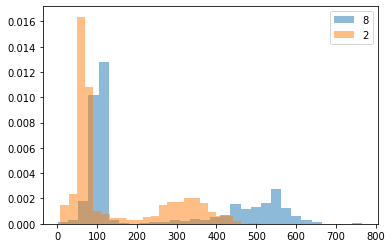

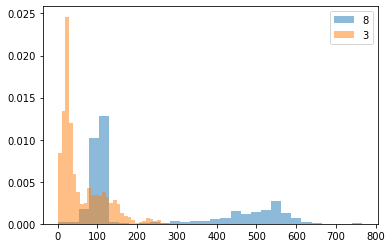

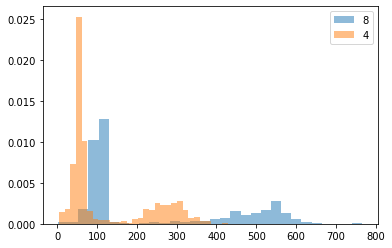

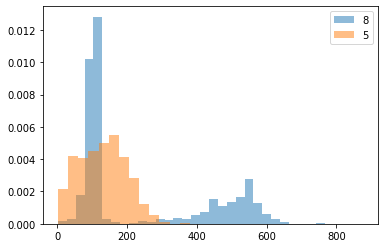

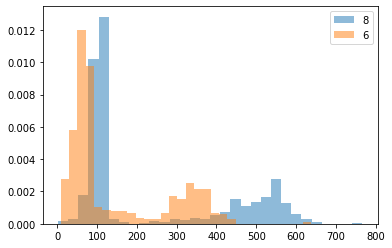

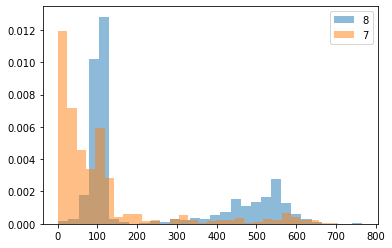

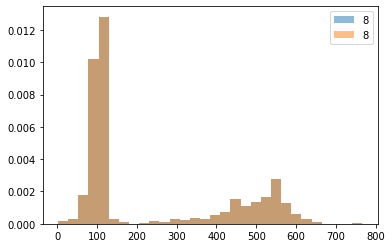

In [109]:
for a, b in itertools.product(lesion_types.keys(), repeat=2):
    a_slices = metadata[metadata['Coarse_lesion_type'] == a]['Key_slice_index'].values
    b_slices = metadata[metadata['Coarse_lesion_type'] == b]['Key_slice_index'].values
    plt.hist(a_slices, density=True, bins=30, alpha = 0.5, label=f'{a}')
    plt.hist(b_slices, density=True, bins=30, alpha = 0.5, label=f'{b}')
    plt.legend()
    plt.show()

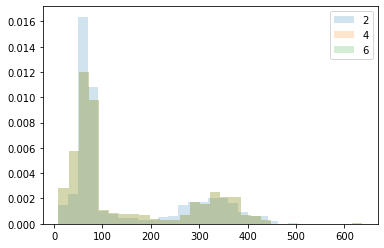

In [116]:
a_slices = metadata[metadata['Coarse_lesion_type'] == 2]['Key_slice_index'].values
b_slices = metadata[metadata['Coarse_lesion_type'] == 4]['Key_slice_index'].values
b_slices = metadata[metadata['Coarse_lesion_type'] == 6]['Key_slice_index'].values
plt.hist(a_slices, density=True, bins=30, alpha = 0.2, label='2')
plt.hist(b_slices, density=True, bins=30, alpha = 0.2, label='4')
plt.hist(b_slices, density=True, bins=30, alpha = 0.2, label='6')
plt.legend()
plt.show()

# Create train/val/test split

In [117]:
print(len(metadata[metadata['Coarse_lesion_type'] == 2]), 
      len(metadata[metadata['Coarse_lesion_type'] == 4]),
      len(metadata[metadata['Coarse_lesion_type'] == 6]))

2176 1284 495


In [166]:
sub_metadata = metadata[metadata['Coarse_lesion_type'].isin([2, 4, 6])]
patients = sub_metadata['Patient_index'].sample(frac=1.0, random_state=42).unique()
train_patients, test_patients, val_patients = np.split(patients, [int(.4*len(patients)), int(.7*len(patients))])
train = sub_metadata[sub_metadata['Patient_index'].isin(train_patients)]
val = sub_metadata[sub_metadata['Patient_index'].isin(val_patients)]
test = sub_metadata[sub_metadata['Patient_index'].isin(test_patients)]
print(f"Train size: {len(train)}\nVal size: {len(val)}\nTest size: {len(test)}")
print(f"Patients:\nTrain frac: {len(train_patients) / len(patients)}\nVal size: {len(val_patients) / len(patients)}\nTest size: {len(test_patients) / len(patients)}")
print(f"Slices:\nTrain frac: {len(train) / len(sub_metadata)}\nVal size: {len(val) / len(sub_metadata)}\nTest size: {len(test) / len(sub_metadata)}")

Train size: 2642
Val size: 423
Test size: 890
Patients:
Train frac: 0.4
Val size: 0.3
Test size: 0.3
Slices:
Train frac: 0.6680151706700379
Val size: 0.10695322376738306
Test size: 0.225031605562579


# Copy files

In [173]:
for dataset, fold in [(train, "train"), (val, "val"), (test, "test")]:
    dataset.to_csv(os.path.join("data", fold + ".csv"), header=True, index=False)
    print(f"Copying {fold} images...")
    os.makedirs(os.path.join("data", fold), exist_ok=True)
    for i, row in tqdm(enumerate(dataset.itertuples()), total=len(dataset)):
        shutil.copy(os.path.join("data", "images", row.File_name), os.path.join(fold, row.File_name))

Copying train images...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2642/2642 [00:30<00:00, 85.68it/s]


Copying val images...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 423/423 [00:08<00:00, 52.22it/s]


Copying test images...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 890/890 [00:12<00:00, 70.19it/s]
